# Assignment 03 Part A - FastAI

## Assignment Description

Perform the following task:
Use FastAI to write a detailed Colab notebook that shows training and inference for the following task using FastAI. Showcase results and metrics:

- Vision object detection task

### Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install fastai
!pip install ucimlrepo


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision import *
from fastai.collab import *
from io import BytesIO
import pandas as pd
import requests
import os

###**Vision Object Detection Task**

In [8]:
pip install --upgrade git+https://github.com/rbrtwlz/fastai_object_detection

  Cloning https://github.com/rbrtwlz/fastai_object_detection to c:\users\amart\appdata\local\temp\pip-req-build-me6fh1qd
  Resolved https://github.com/rbrtwlz/fastai_object_detection to commit 8935053a856e1bbaa793f9b9abb3922365ef3c8d
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/bes-dev/mean_average_precision to c:\users\amart\appdata\local\temp\pip-install-b93d_zxo\mean-average-precision_2898f562abb54be3b27cf69c3873287a
  Resolved https://github.com/bes-dev/mean_average_precision to commit 477749cf84cb7136f38974c454ee7206df447dc5
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/197.9 kB ? eta -:--:--
   ---------------------------------------- 197.9/197.9 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/157.9 MB ? eta -:--:--
   ---------------------------------------- 0.7/157.9 

  Running command git clone --filter=blob:none --quiet https://github.com/rbrtwlz/fastai_object_detection 'C:\Users\amart\AppData\Local\Temp\pip-req-build-me6fh1qd'
  Running command git clone --filter=blob:none --quiet https://github.com/bes-dev/mean_average_precision 'C:\Users\amart\AppData\Local\Temp\pip-install-b93d_zxo\mean-average-precision_2898f562abb54be3b27cf69c3873287a'
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from fastai_object_detection.all import *

path, df = CocoData.create(ds_name="coco-cats-and-dogs", cat_list=["cat", "dog"],
                           max_images=2000, with_mask=False)

Dataset coco-cats-and-dogs already exists: C:\Users\amart\.fastai\data\coco-cats-and-dogs


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


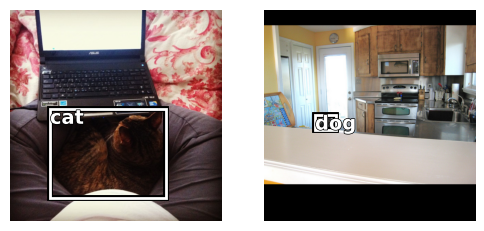

In [5]:
dls = ObjectDetectionDataLoaders.from_df(df, bs=2,
                                         item_tfms=[Resize(800, method="pad", pad_mode="zeros")],
                                         batch_tfms=[Normalize.from_stats(*imagenet_stats)])
dls.show_batch()

In [6]:
learn = fasterrcnn_learner(dls, fasterrcnn_resnet50,
                           opt_func=SGD, lr=0.005, wd=0.0005, train_bn=False,
                           metrics=[mAP_at_IoU40, mAP_at_IoU60])
learn.freeze()

C:\Users\amart\AppData\Local\Programs\Python\Python39\lib\site-packages\fastai_object_detection\callbacks.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(x1)
C:\Users\amart\AppData\Local\Programs\Python\Python39\lib\site-packages\fastai_object_detection\callbacks.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y[k] = [torch.tensor(e) for e in yb[i]]


SuggestedLRs(valley=0.0063095735386013985)

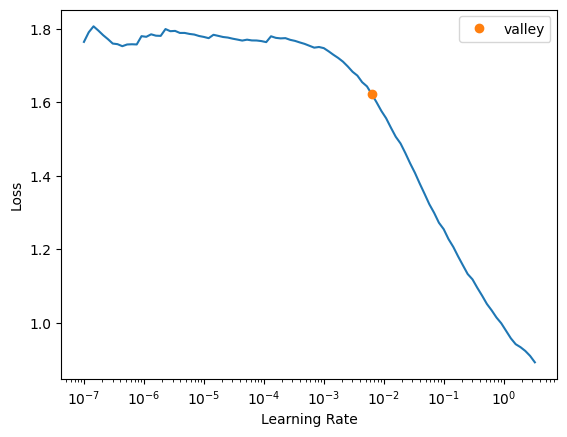

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(1, 1.2e-03)

epoch,train_loss,valid_loss,mAP@IoU>0.4,mAP@IoU>0.6,time
0,0.259129,0.252502,0.124936,0.027631,3:50:11


In [7]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(3, 1.2e-03)

epoch,train_loss,valid_loss,mAP@IoU>0.4,mAP@IoU>0.6,time
0,0.222819,0.224355,0.365041,0.185576,7:44:24
1,0.201988,0.206797,0.479833,0.285770,7:47:26
2,0.196886,0.208690,0.490611,0.299108,7:47:18


In [8]:
# Evaluate the model
results = learn.validate()
print("Validation Results:", results)


C:\Users\amart\AppData\Local\Programs\Python\Python39\lib\site-packages\fastai_object_detection\callbacks.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(x1)
C:\Users\amart\AppData\Local\Programs\Python\Python39\lib\site-packages\fastai_object_detection\callbacks.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y[k] = [torch.tensor(e) for e in yb[i]]


Validation Results: [1.0184072256088257, 0.015267725102603436, 0.002246047370135784]
